In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
#reading csv file named 'car data'
car_df=pd.read_csv('car data.csv')
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
car_df.shape

(301, 9)

In [22]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [23]:
car_df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [24]:
car_df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [25]:
car_df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_df.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)

In [28]:
#renaming 'year' column to 'age' 
car_df.rename(columns={'Year':'Age'}, inplace= True)

In [29]:
car_df['Age']= 2023 - car_df['Age']
car_df.head()

,Car_Name,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,9,3.35,5.59,27000,0,0,0,0
1,sx4,10,4.75,9.54,43000,1,0,0,0
2,ciaz,6,7.25,9.85,6900,0,0,0,0
3,wagon r,12,2.85,4.15,5200,0,0,0,0
4,swift,9,4.60,6.87,42450,1,0,0,0


Text(0.5, 1.0, 'Variation of present price with Age')

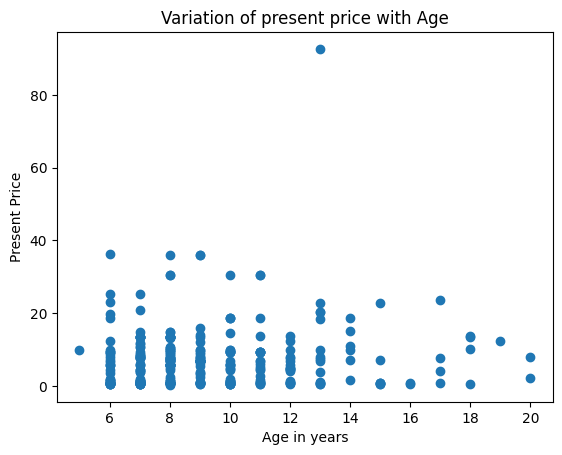

In [30]:
plt.scatter(car_df['Age'],car_df['Present_Price'])
plt.xlabel('Age in years')
plt.ylabel('Present Price')
plt.title('Variation of present price with Age')

In [31]:
X=car_df.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_df['Selling_Price']
print(X)
print(Y)

     Age  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0      9           5.59       27000          0            0             0      0
1     10           9.54       43000          1            0             0      0
2      6           9.85        6900          0            0             0      0
3     12           4.15        5200          0            0             0      0
4      9           6.87       42450          1            0             0      0
..   ...            ...         ...        ...          ...           ...    ...
296    7          11.60       33988          1            0             0      0
297    8           5.90       60000          0            0             0      0
298   14          11.00       87934          0            0             0      0
299    6          12.50        9000          1            0             0      0
300    7           5.90        5464          0            0             0      0

[301 rows x 7 columns]
0   

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [40]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, y_test_pred)
    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('_'*40)
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('_'*40)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.8053
- Mean Absolute Error: 1.2166
- R2 Score: 0.8799
________________________________________
Model performance for Test set
- Root Mean Squared Error: 1.4663
- Mean Absolute Error: 1.1516
- R2 Score: 0.8366
________________________________________


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.0659
- Mean Absolute Error: 1.2863
- R2 Score: 0.8428
________________________________________
Model performance for Test set
- Root Mean Squared Error: 1.3032
- Mean Absolute Error: 1.0507
- R2 Score: 0.8709
________________________________________


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.8055
- Mean Absolute Error: 1.2128
- R2 Score: 0.8799
________________________________________
Model performance for Test set
- Root Mean Squared Error: 1.4505
- Mean Absolute Error: 1.1431
- R2 Score: 0.8401
________________________________________


K-Neighbors Regressor


In [47]:
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

ada_params={
    "n_estimators":[50,60,70,80],
    "loss":['linear','square','exponential']
}
gb_params={
    "loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
    "criterion":['friedman_mse', 'squared_error'],
    "n_estimators":[50,60,70,80,100]
}
    

In [48]:
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params),
                   ("Adaboost",AdaBoostRegressor(),ada_params),
                   ("GB",GradientBoostingRegressor(),gb_params)
                   ]

In [49]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, Y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"********** Best Params for {model_name} **********")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
********** Best Params for KNN **********
{'n_neighbors': 40}
********** Best Params for RF **********
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 7, 'max_depth': 8}
********** Best Params for Adaboost **********
{'n_estimators': 60, 'loss': 'square'}
********** Best Params for GB **********
{'n_estimators': 60, 'loss': 'huber', 'criterion': 'friedman_mse'}


In [52]:
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features=7, max_depth=8, 
                                                     n_jobs=-1),
     "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=40, n_jobs=-1),
     "Adaboost":AdaBoostRegressor(n_estimators=60,loss='square'),
     "GradientBoost":GradientBoostingRegressor(n_estimators=60,loss='huber',criterion='friedman_mse')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('_'*40)
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('_'*40)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.7095
- Mean Absolute Error: 0.2956
- R2 Score: 0.9815
________________________________________
Model performance for Test set
- Root Mean Squared Error: 0.4181
- Mean Absolute Error: 0.2980
- R2 Score: 0.9867
________________________________________


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.1015
- Mean Absolute Error: 3.4307
- R2 Score: 0.0413
________________________________________
Model performance for Test set
- Root Mean Squared Error: 3.6033
- Mean Absolute Error: 3.2307
- R2 Score: 0.0132
________________________________________


Adaboost
Model performance for Training set
- Root Mean Squared Error: 1.1463
- Mean Absolute Error: 0.9271
- R2 Score: 0.9516
________________________________________
Model performance for Test set
- Root Mean Squared Error: 1.0331
- Mean Absolute Error: 0.8780
- R2 Score: 0.9189
________________________________________